In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow import keras
import tensorflow as tf

## 1) The Dataset

- Assuming you have a classification problem, is it binary, multi-class or multi-label?

- Show a few examples per class

- How many classes?

- How many images per class?

- Train/Test sizes

- Image size?

- How are the images labeled?

- Dataset source(s)?

- I choose binary classification model with 2 classes: "fire" and "no-fire"

- I created a folder with 500 images per class 
- I split data in train, validation and test data with 80-10-10
- Images are size 256x256
- Image are labeled: 0 for no-fire and 1 for fire 
- I used imsitu dataset and pictures from Google



(-0.5, 255.5, 255.5, -0.5)

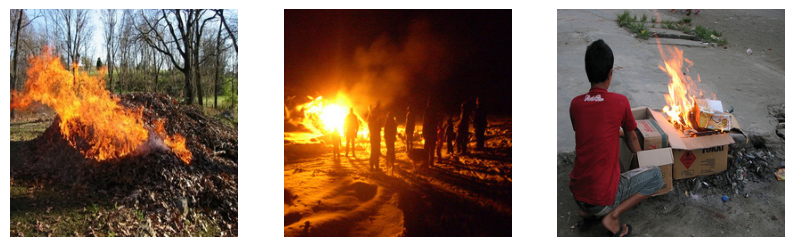

In [2]:
fire_example1= plt.imread("C:\Fire_dataset/1/burning_27.jpg")
fire_example2= plt.imread("C:\Fire_dataset/1/flaming_167.jpg")
fire_example3= plt.imread("C:\Fire_dataset/1/burning_176.jpg")
fig=plt.figure(figsize=(10,4))
# showing 1 
fig.add_subplot(1,3,1)
plt.imshow(fire_example1)
plt.axis('off')
# showing 2
fig.add_subplot(1,3,2)
plt.imshow(fire_example2)
plt.axis('off')
# showing 3
fig.add_subplot(1,3,3)
plt.imshow(fire_example3)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

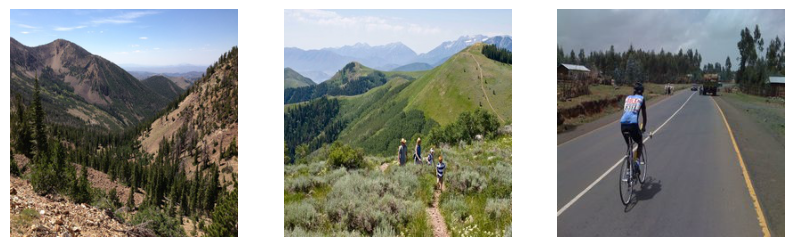

In [3]:
nofire_example1= plt.imread("C:\Fire_dataset/0/ascending_95.jpg")
nofire_example2= plt.imread("C:\Fire_dataset/0/hiking_290.jpg")
nofire_example3= plt.imread("C:\Fire_dataset/0/biking_37.jpg")
fig=plt.figure(figsize=(10,4))
# showing 1 
fig.add_subplot(1,3,1)
plt.imshow(nofire_example1)
plt.axis('off')
# showing 2
fig.add_subplot(1,3,2)
plt.imshow(nofire_example2)
plt.axis('off')
# showing 3
fig.add_subplot(1,3,3)
plt.imshow(nofire_example3)
plt.axis('off')

In [4]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= plt.imread(image_path)
            image=np.array(image)
            image = image.astype('float32')
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

In [5]:
# extract the image array and class name
img_data_array, class_name =create_dataset("C:\Fire_dataset")
X= np.array(img_data_array).astype('uint8')
y=np.array(class_name).astype('float')

## 2) Baselines

- Random guess accuracy? 50%

- Human-Level Performance accuracy? 94.5 %

- Multilayer Perceptron accuracy? 81.5%

## 3) Pre-processing

1. I scaraped images from imSitu dataset using the item "fire" and verb "burning". I choose the images that was good representation of natural fire (removing drawing of fire and colorful flames). At the end, I took about 20 pictures from Google that represented fire in forests as imSitu data was missing those. For no-fire class I used pictutres that represents different environments, mostly outdoors and in nature. I used images representing such activities as camping, hiking, biking and more. I used 500 images per each class. 


2. I loaded folder with train data using "os" and I created labels based on name of folders. The labels are: 0 for no-fire and 1 for fire. Therefore, the photo in folder "0" is signed to class "no-fire" and each photo in folder "1" represents fire. 

3. I split the train data into train and validation data. I have different data for test and valiudation, because I want to show accuracy with data that the model didn't see before without any data leaks. I split the data: 80% train data, 10% validation data and 10% test data. 


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_pre, y_train, y_pre = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=42)

In [7]:
X_test, X_val, y_test, y_val = train_test_split(X_pre,
                                                    y_pre,
                                                    test_size=0.5,random_state=0)

In [8]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((800, 256, 256, 3), (100, 256, 256, 3), (800,), (100,))

In [9]:
X_test.shape, y_test.shape

((100, 256, 256, 3), (100,))

## 4) CNN architecture

In [10]:
from keras.callbacks import EarlyStopping
monitor_val_acc = EarlyStopping(monitor ='val_accuracy', patience = 2)

### Model without data augmentation

In [11]:
def build_model(print_summary=False):
    model= Sequential()
    model.add(Conv2D(32, activation='relu',kernel_size=3,input_shape=(256,256,3)))
    model.add(MaxPool2D(2))
    model.add(Conv2D(64,activation='relu',kernel_size=3))
    model.add(MaxPool2D(2))
    model.add(Conv2D(128,activation='relu',kernel_size=3))
    model.add(MaxPool2D(2))
    model.add(Conv2D(128,activation='relu',kernel_size=3))
    model.add(MaxPool2D(2))
    model.add(Flatten())
    model.add(Dense(256,activation="relu"))
    model.add(Dense(1,activation="sigmoid"))
    if print_summary:
        model.summary()
    return model

In [12]:
from keras.optimizers import Adam
def compile_model(model, lr):
    opt=Adam(lr=lr)
    model.compile(loss='binary_crossentropy', optimizer=opt ,metrics=['accuracy'])
    return model

In [13]:
model1=build_model()
model1=compile_model(model1,lr=0.0001)

c:\Users\korne\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
model1.fit(X_train,y_train,epochs=50,callbacks = monitor_val_acc,validation_data=(X_val, y_val))

Epoch 1/50
25/25 [==============================] - 32s 1s/step - loss: 9.7469 - accuracy: 0.6325 - val_loss: 0.6920 - val_accuracy: 0.7200
Epoch 2/50
25/25 [==============================] - 30s 1s/step - loss: 0.3637 - accuracy: 0.8350 - val_loss: 0.3085 - val_accuracy: 0.8600
Epoch 3/50
25/25 [==============================] - 29s 1s/step - loss: 0.2150 - accuracy: 0.9137 - val_loss: 0.2369 - val_accuracy: 0.8800
Epoch 4/50
25/25 [==============================] - 30s 1s/step - loss: 0.1684 - accuracy: 0.9375 - val_loss: 0.2705 - val_accuracy: 0.8900
Epoch 5/50
25/25 [==============================] - 31s 1s/step - loss: 0.1241 - accuracy: 0.9563 - val_loss: 0.1952 - val_accuracy: 0.8900
Epoch 6/50
25/25 [==============================] - 31s 1s/step - loss: 0.0871 - accuracy: 0.9737 - val_loss: 0.1835 - val_accuracy: 0.9000
Epoch 7/50
25/25 [==============================] - 31s 1s/step - loss: 0.0717 - accuracy: 0.9775 - val_loss: 0.2097 - val_accuracy: 0.9100
Epoch 8/50
25/25 [==

In [15]:
model1.evaluate(X_test,y_test)

4/4 [==============================] - 1s 153ms/step - loss: 0.2940 - accuracy: 0.8900


[0.2939698398113251, 0.8899999856948853]

### Model with data augmentation

In [16]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)
                             

In [17]:
model=build_model(print_summary=True)
model=compile_model(model,lr=0.0001)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 128)     

In [18]:
hist=model.fit(datagen.flow(X_train,  y_train), epochs = 50, callbacks = monitor_val_acc,validation_data=(X_val, y_val))

Epoch 1/50
25/25 [==============================] - 35s 1s/step - loss: 10.2678 - accuracy: 0.6300 - val_loss: 0.5792 - val_accuracy: 0.8000
Epoch 2/50
25/25 [==============================] - 33s 1s/step - loss: 0.3784 - accuracy: 0.8275 - val_loss: 0.3234 - val_accuracy: 0.8500
Epoch 3/50
25/25 [==============================] - 32s 1s/step - loss: 0.3536 - accuracy: 0.8550 - val_loss: 0.4230 - val_accuracy: 0.8400
Epoch 4/50
25/25 [==============================] - 33s 1s/step - loss: 0.2870 - accuracy: 0.8863 - val_loss: 0.2602 - val_accuracy: 0.8700
Epoch 5/50
25/25 [==============================] - 33s 1s/step - loss: 0.2634 - accuracy: 0.8925 - val_loss: 0.2257 - val_accuracy: 0.8700
Epoch 6/50
25/25 [==============================] - 33s 1s/step - loss: 0.2379 - accuracy: 0.9025 - val_loss: 0.2221 - val_accuracy: 0.8800
Epoch 7/50
25/25 [==============================] - 32s 1s/step - loss: 0.2403 - accuracy: 0.9087 - val_loss: 0.2190 - val_accuracy: 0.8700
Epoch 8/50
25/25 [=

In [19]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 1s 165ms/step - loss: 0.1616 - accuracy: 0.9500


[0.16155673563480377, 0.949999988079071]

### Transfer model 

In [20]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [21]:
transfer_model = MobileNetV2(weights='imagenet', include_top=False)
transfer_model.trainable=False

In [22]:
inputs = keras.Input(shape=(256, 256, 3))
x = transfer_model(inputs)
x= Conv2D(32, activation='relu',kernel_size=2)(x)
x=MaxPool2D(2)(x)
x=Flatten()(x)
x=Dense(512,activation='relu')(x) 
x=Dense(128,activation='relu')(x) 
output=Dense(1,activation='sigmoid')(x) 


In [23]:
new_model=keras.Model(inputs,output)

In [24]:
new_model=compile_model(new_model,lr=0.001)

In [25]:
new_model.fit(datagen.flow(X_train,  y_train), epochs = 50, callbacks = monitor_val_acc,validation_data=(X_val, y_val))

Epoch 1/50
25/25 [==============================] - 24s 865ms/step - loss: 0.6907 - accuracy: 0.7013 - val_loss: 0.4188 - val_accuracy: 0.8200
Epoch 2/50
25/25 [==============================] - 21s 844ms/step - loss: 0.4302 - accuracy: 0.8163 - val_loss: 0.4446 - val_accuracy: 0.7900
Epoch 3/50
25/25 [==============================] - 21s 823ms/step - loss: 0.3887 - accuracy: 0.8263 - val_loss: 0.3298 - val_accuracy: 0.8700
Epoch 4/50
25/25 [==============================] - 21s 832ms/step - loss: 0.3584 - accuracy: 0.8400 - val_loss: 0.5732 - val_accuracy: 0.7400
Epoch 5/50
25/25 [==============================] - 21s 831ms/step - loss: 0.3553 - accuracy: 0.8600 - val_loss: 0.3112 - val_accuracy: 0.8700


In [26]:
new_model.evaluate(X_test,y_test)

4/4 [==============================] - 2s 380ms/step - loss: 0.3291 - accuracy: 0.8400


[0.3291124403476715, 0.8399999737739563]

## 5) CNN training


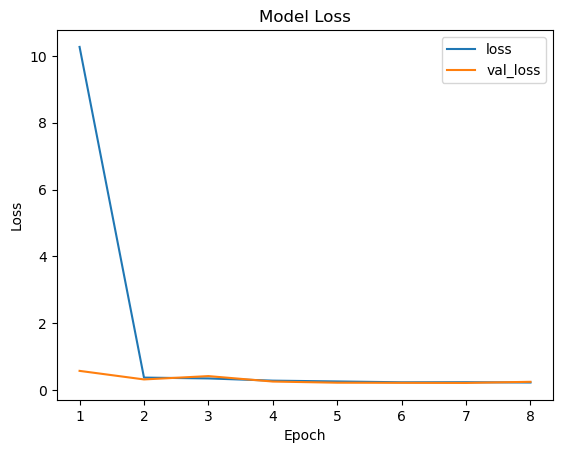

In [27]:
loss= hist.history['loss']
val_loss=hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs,loss, label='loss')
plt.plot(epochs,val_loss, label='val_loss')
plt.ylabel('Loss')
plt.xlabel('Epoch') 
plt.title('Model Loss')
plt.legend(loc='upper right')

## 6) Model performance

Metrics plots

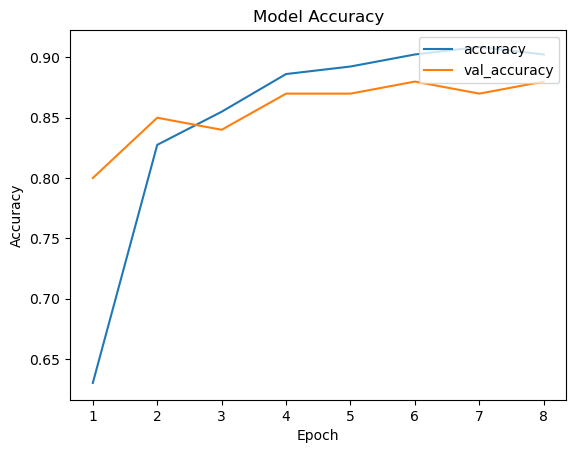

In [28]:
acc= hist.history['accuracy']
val_acc=hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs,acc, label='accuracy')
plt.plot(epochs,val_acc, label='val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper right')


In [29]:
y_pred=model.predict(X_test)
y_pred_binary = 1*(y_pred> 0.5)

4/4 [==============================] - 1s 160ms/step


In [30]:
y_pred_binary=y_pred_binary.reshape(100,)

In [31]:
import sklearn.metrics as metrics

In [32]:
cm=metrics.confusion_matrix(y_test,y_pred_binary)

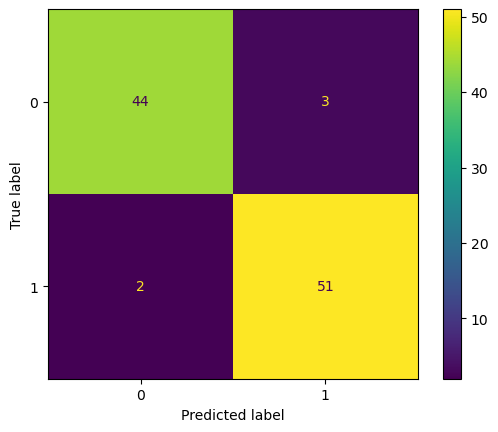

In [33]:
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [34]:
metrics.f1_score(y_test,y_pred_binary)

0.9532710280373832

In [35]:
metrics.recall_score(y_test,y_pred_binary)

0.9622641509433962

## 7) Error analysis

Top error interpretation

In [36]:
incorrect_indices= np.nonzero(y_pred_binary != y_test)[0]

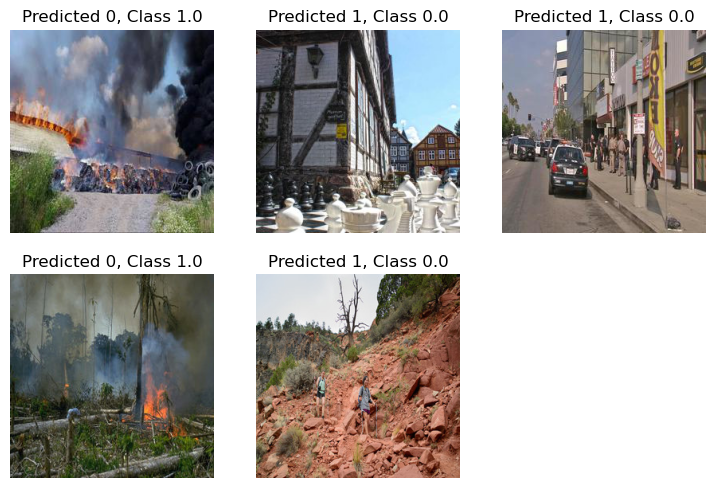

In [69]:
plt.figure(figsize=[9,9])
for i, incorrect in enumerate(incorrect_indices[:5]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect])
    plt.axis(False)
    plt.title("Predicted {}, Class {}".format(y_pred_binary[incorrect], y_test[incorrect]))
plt.show()

## 8) XAI 

In [38]:
from IPython.display import Image, display
import matplotlib.cm as cm

In [39]:
def make_gradcam_heatmap(image_path, model, last_conv_layer_name, pred_index):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img=img.reshape(1,256,256,3)
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img)
        class_channel = preds[:pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [40]:
layer_names=[layer.name for layer in model.layers]

In [41]:
last_conv_layer_name=layer_names[6]

In [42]:
last_conv_layer_name

'conv2d_7'

In [43]:
image_path = "C:\Fire_dataset/1/destroying_270.jpg"
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256,3))
img = tf.keras.preprocessing.image.img_to_array(img)
class_name=1

In [44]:
heatmap = make_gradcam_heatmap(image_path, model, last_conv_layer_name,class_name )

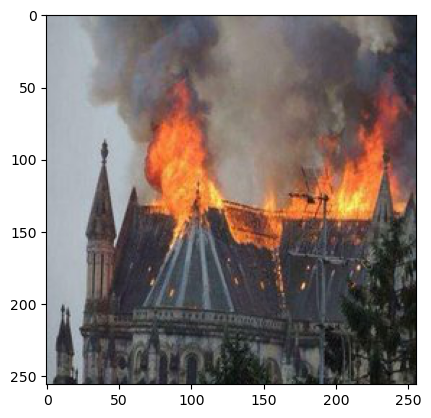

In [45]:
plt.imshow((img).astype('uint8'))
plt.show()

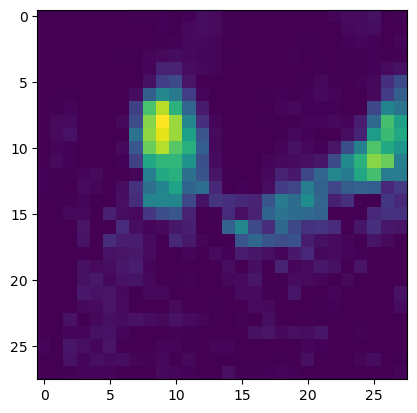

In [46]:
plt.imshow(heatmap)
plt.show()

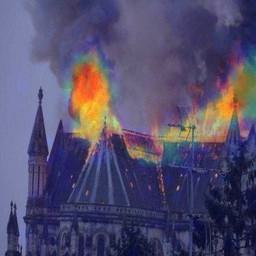

In [47]:
def save_and_display_gradcam(image_path, heatmap, cam_path, alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    superimposed_img.save(cam_path)
    display(Image(cam_path))


save_and_display_gradcam(image_path, heatmap,"cam1.jpg")

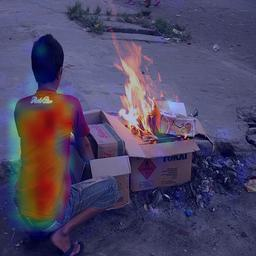

In [48]:
heatmap1 = make_gradcam_heatmap("C:\Fire_dataset/1/burning_176.jpg", model, last_conv_layer_name, 1)
save_and_display_gradcam("C:\Fire_dataset/1/burning_176.jpg", heatmap1,"cam2.jpg")

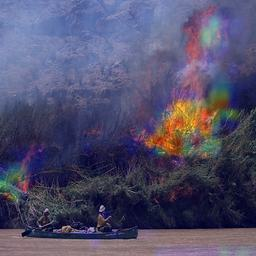

In [49]:
heatmap2=make_gradcam_heatmap("C:\Fire_dataset/1/cresting_159.jpg",model,last_conv_layer_name, 1)
save_and_display_gradcam("C:\Fire_dataset/1/cresting_159.jpg",heatmap2,"cam3.jpg")